# Import libaries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import numpy as np

# Load data

In [2]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

train_data.shape, test_data.shape, train_labels.shape, test_labels.shape

11493376/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

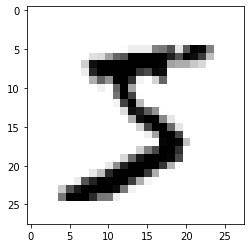

In [3]:
plt.imshow(train_data[0], cmap=plt.cm.binary)

In [4]:
train_labels[0]

5

In [5]:
set(train_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

## Preprocessing data

In [6]:
# Normalized data
train_data_norm = train_data / train_data.max()
test_data_norm = test_data / test_data.max()

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [7]:
# one_hot labels
train_labels_one_hot = tf.one_hot(train_labels, depth=10)
test_labels_one_hot = tf.one_hot(test_labels, depth=10)

train_labels_one_hot.shape, train_labels_one_hot[0]

(TensorShape([60000, 10]),
 <tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)>)

In [ ]:
# Prefecth the data
# train_data_norm

# Let's build a model

In [14]:
# set random state
tf.random.set_seed(42)

# build a model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="sigmoid") # output layer
])
# compile the model
model_1.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
# Train the model
history_1 = model_1.fit(
    train_data_norm,
    train_labels_one_hot,
    validation_data=(test_data_norm, test_labels_one_hot),
    epochs=20
)

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0472 - accuracy: 0.6442 - val_loss: 0.7344 - val_accuracy: 0.7569
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6970 - accuracy: 0.7717 - val_loss: 0.6814 - val_accuracy: 0.7860
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6434 - accuracy: 0.8000 - val_loss: 0.6276 - val_accuracy: 0.8119
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6126 - accuracy: 0.8127 - val_loss: 0.6022 - val_accuracy: 0.8223
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5921 - accuracy: 0.8207 - val_loss: 0.5926 - val_accuracy: 0.8231
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5752 - accuracy: 0.8272 - val_loss: 0.5817 - val_accuracy: 0.8277
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5625 - accuracy: 0.8316 - val_loss: 0.5828 - val_accuracy:

In [17]:
model_1_results = model_1.evaluate(test_data_norm, test_labels_one_hot)
model_1_results

313/313 [==============================] - 0s 697us/step - loss: 0.5230 - accuracy: 0.8520


[0.5229856967926025, 0.8519999980926514]

In [51]:
train_data_norm = train_data_norm.prefecth(tf.data.AUTOTUNE)
test_data_norm = test_data_norm.prefecth(tf.data.AUTOTUNE)

AttributeError: ignored

### Model 2: More Hiddent unit

In [53]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                           patience=5,
                                                           restore_best_weights=True)

In [61]:
# set random state
tf.random.set_seed(42)

# build a model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(400, activation="relu"),
  tf.keras.layers.Dense(200, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output layer
])
# compile the model
model_2.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
# Train the model
history_2 = model_2.fit(
    train_data_norm,
    train_labels_one_hot,
    validation_data=(test_data_norm, test_labels_one_hot),
    epochs=10,
    callbacks=[early_stopping_callback]
)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2008 - accuracy: 0.9395 - val_loss: 0.1037 - val_accuracy: 0.9668
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0872 - accuracy: 0.9732 - val_loss: 0.1313 - val_accuracy: 0.9614
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0627 - accuracy: 0.9804 - val_loss: 0.0810 - val_accuracy: 0.9757
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0473 - accuracy: 0.9854 - val_loss: 0.0738 - val_accuracy: 0.9794
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0399 - accuracy: 0.9876 - val_loss: 0.0813 - val_accuracy: 0.9755
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0313 - accuracy: 0.9897 - val_loss: 0.0941 - val_accuracy: 0.9751
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0280 - accuracy: 0.9912 - val_loss: 0.0672 - val_accuracy:

In [62]:
model_2_resuls = model_2.evaluate(test_data_norm, test_labels_one_hot)

313/313 [==============================] - 1s 2ms/step - loss: 0.0917 - accuracy: 0.9818


### Create results

In [21]:
!wget 

--2021-08-17 15:48:00--  https://www.kaggle.com/c/digit-recognizer/data?select=test.csv
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘data?select=test.csv’

data?select=test.cs     [ <=>                ]  28.65K  --.-KB/s    in 0.09s   

2021-08-17 15:48:01 (329 KB/s) - ‘data?select=test.csv’ saved [29337]



In [22]:
!wget https://raw.githubusercontent.com/BaoLocPham/Tensorflow_Deep_Learning/main/Utils/helper_functions.py

--2021-08-17 15:48:41--  https://raw.githubusercontent.com/BaoLocPham/Tensorflow_Deep_Learning/main/Utils/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11240 (11K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.98K  --.-KB/s    in 0s      

2021-08-17 15:48:41 (90.0 MB/s) - ‘helper_functions.py’ saved [11240/11240]



In [23]:
from helper_functions import unzip_data

In [25]:
unzip_data("/content/test.csv.zip")

In [56]:
import pandas as pd

test_data = pd.read_csv("test.csv")

In [57]:
model_2_pred_prop = model_2.predict(test_data)
model_2_pred_prop.shape

(28000, 10)

In [58]:
model_2_pred = tf.argmax(model_2_pred_prop, axis=1)
model_2_pred[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([2, 0, 9, 0, 3, 7, 0, 3, 0, 3])>

In [59]:
results = pd.DataFrame({"ImageId": test_data.index +1, "Label": model_2_pred})
results.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [60]:
results.to_csv("submission_3.csv", index=False)

## Evaluate the model

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

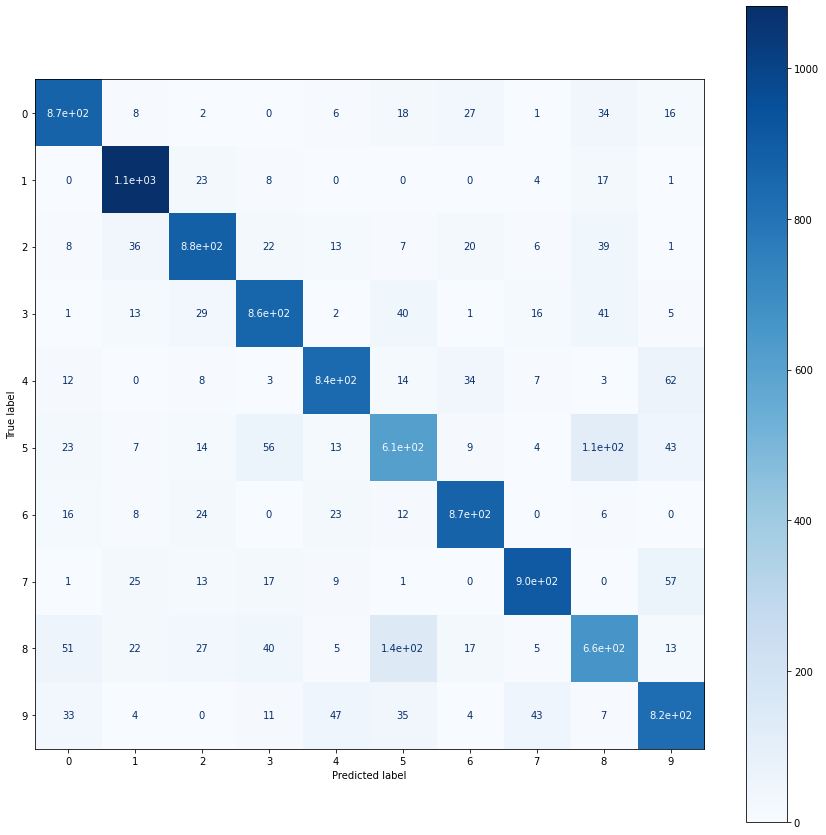

In [10]:
y_preds = model_1.predict(test_data_norm)
y_preds = tf.argmax(y_preds, axis=1)

cm = confusion_matrix(test_labels, y_preds)
fig, ax = plt.subplots(figsize=(15,15))
labels = [str(x) for x in np.arange(0, 10)]
cmd = ConfusionMatrixDisplay(cm, display_labels=[*labels])
cmd.plot(cmap="Blues", ax=ax)

In [11]:
import random
def plot_random_image(model, images, true_labels, classes):
  """
  Pick a random image, plots it and labels it with a predicted & truth label
  """
  # Set up random integer
  rand_index = random.randint(0, len(images))

  # Create a predictions and target
  target_image = images[rand_index]
  pred_props = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_props.argmax()]
  true_label = classes[true_labels[rand_index]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Char color of the title depending if prediction is right or wrongs
  if pred_label == true_label:
    color="green"
  else:
    color="red"
  
  # Add x label information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_props), true_label), color=color)

In [12]:
classes_name = [str(x) for x in np.arange(0, 10)]

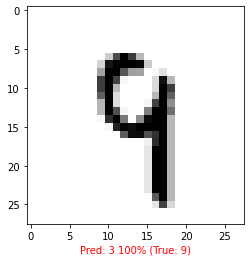

In [13]:
plot_random_image(model_1, test_data, test_labels, classes_name)